In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import sklearn 

In [3]:
csv = pd.read_csv("insurance.csv")
dataset_insurance = pd.DataFrame(csv)
dataset_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

### Data Management

In [4]:
dataset_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

On remarque que sex, smoker et region sont des objets, on va donc les transformer en données numériques <br>

- Sex: male=0, female=1
- Smoker: no=0, yes=1
- Region: northeast=0, southeast=1, southwest=2, northwest=3

In [5]:
print("nombre de valeur colonne sex",dataset_insurance['sex'].unique())
print("nombre de valeur colonne smoker",dataset_insurance['smoker'].unique())
print("nombre de valeur colonne region",dataset_insurance['region'].unique())

dataset_insurance.isnull()

dataset_insurance['sex']=dataset_insurance['sex'].replace('male',0)
dataset_insurance['sex']=dataset_insurance['sex'].replace('female',1)

dataset_insurance['smoker']=dataset_insurance['smoker'].replace('no',0)
dataset_insurance['smoker']=dataset_insurance['smoker'].replace('yes',1)

dataset_insurance['region']=dataset_insurance['region'].replace('northeast',0)
dataset_insurance['region']=dataset_insurance['region'].replace('southeast',1)
dataset_insurance['region']=dataset_insurance['region'].replace('southwest',0)
dataset_insurance['region']=dataset_insurance['region'].replace('northwest',1)

dataset_insurance.head()




nombre de valeur colonne sex ['female' 'male']
nombre de valeur colonne smoker ['yes' 'no']
nombre de valeur colonne region ['southwest' 'southeast' 'northwest' 'northeast']


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


### Regression multiple

In [6]:
# séparer les datasets ( training et test)
X_train, X_test, y_train, y_test = train_test_split(dataset_insurance.drop(['charges'],axis=1),dataset_insurance['charges'], test_size=0.2, random_state= 0)

In [7]:
# créer le modèle de régression multiple 
# entrainement du modèle de régression 
reg  = LinearRegression()
reg.fit(X_train, y_train)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic = reg.predict(X_test)

print("coefficients de regression:",reg.coef_)

coefficients de regression: [ 2.54776907e+02  2.17798094e+01  3.22737384e+02  4.27477330e+02
  2.36002895e+04 -1.91285985e+02]


In [8]:
rmse_testData = mean_squared_error(y_test,y_predic)
print("ecart type des residus (erreur de prédiction)",rmse_testData) 

ecart type des residus (erreur de prédiction) 32149530.206277784


On remarque qu'on a une erreur de prédiction sur les données de test qui est assez élevé. <br>
On peut regarder l'erreur sur les données d'entrainement afin de voir si le modèle n'a pas fait de l'overfitting.

In [9]:
#
y_predic_trainData = reg.predict(X_train)
rmse_trainData =math.sqrt(mean_squared_error(y_train,y_predic_trainData))
print("score :",sklearn.metrics.r2_score(y_test, y_predic, multioutput='uniform_average', force_finite=True))
print("ecart type des residus (erreur de prédiction)",rmse_trainData) 
print("difference d'erreur entre les deux jeu de données",abs(rmse_trainData - rmse_testData))

score : 0.7979668332906551
ecart type des residus (erreur de prédiction) 6149.780912361591
difference d'erreur entre les deux jeu de données 32143380.425365422


On remarque qu'il y a une différence d'erreur qui n'est pas si important compte tenu de la valeur élevé des rmse. <br>
Ainsi on peut dire qu'il n'y a pas de surapprentissage.
On pourrait entrainer d'autre modèle afin de voir s'il n'y pas d'autre modèle encore moins en surapprenttisage.

Pour ce qui est du score, ce dernier n'est pas mauvais pour un premier entrainement mais il faudrait le tout de même l'améliorer pour une mise en production.

### Scalling

On peut appliquer une méthode de scalling (normalisation entre de valeur), afin de réduire la différence d'interval entre chaque colonne. <br>
Pour cela on reduit nos valeurs à un interval [0,1]

In [10]:
dataset_insurance_normalized=(dataset_insurance-np.min(dataset_insurance))/(np.max(dataset_insurance)-np.min(dataset_insurance))
dataset_insurance_normalized.head()

c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\rayan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,bmi,children,smoker,region,charges
0,0.021739,1.0,0.321227,0.0,1.0,0.0,0.251611
1,0.000000,0.0,0.479150,0.2,0.0,1.0,0.009636
2,0.217391,0.0,0.458434,0.6,0.0,1.0,0.053115
3,0.326087,0.0,0.181464,0.0,0.0,1.0,0.333010
4,0.304348,0.0,0.347592,0.0,0.0,1.0,0.043816


### Regression multiple après Scalling

In [11]:
# séparer les datasets ( training et test)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(dataset_insurance_normalized.drop(['charges'],axis=1),dataset_insurance_normalized['charges'], test_size=0.2, random_state= 0)

reg.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg.predict(X_test_normalized)

print("coefficients de regression:",reg.coef_)

coefficients de regression: [ 1.87071161e-01  3.47650632e-04  1.91483247e-01  3.41170947e-02
  3.76709245e-01 -3.05331843e-03]


In [12]:
rmse_testData = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_testData) 
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))


ecart type des residus (erreur de prédiction) 0.008191294242534976
score : 0.7979668332906552


On remarque que le score n'a pas énormement changé, ce qui veut dire que notre dataset n'était pas concerné par les problèmes que le scalling permet de résoudre. Autrement dit nos données devait être sensiblement à la même échelle.

### Modification des paramètres de la régréssion

Ici nous allons modifier les différents paramètres de la Regression de sklearn afin de voir les repercutions que cela a sur les performances de notre modèle.

In [13]:

# créer le modèle de régression multiple 
# entrainement du modèle de régression 
reg  = LinearRegression(fit_intercept=False)
reg.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg.predict(X_test_normalized)
rmse_fitIntercept_false = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_fitIntercept_false) 
print("coefficients de regression:",reg.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))



ecart type des residus (erreur de prédiction) 0.008555721530239249
coefficients de regression: [ 0.16818737 -0.01035973  0.12959621  0.01804181  0.36953964 -0.0104642 ]
score : 0.7889784613935902


In [14]:
# créer le modèle de régression multiple 
# entrainement du modèle de régression 
reg  = LinearRegression(n_jobs=20)
reg.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg.predict(X_test_normalized)
rmse_n_jobs = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_n_jobs) 
print("coefficients de regression:",reg.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))


ecart type des residus (erreur de prédiction) 0.008191294242534976
coefficients de regression: [ 1.87071161e-01  3.47650632e-04  1.91483247e-01  3.41170947e-02
  3.76709245e-01 -3.05331843e-03]
score : 0.7979668332906552


In [15]:
# créer le modèle de régression multiple 
# entrainement du modèle de régression 
reg  = LinearRegression(positive=True)
reg.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg.predict(X_test_normalized)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))


ecart type des residus (erreur de prédiction) 0.008195446368939263
coefficients de regression: [1.87199929e-01 3.74402785e-04 1.90270494e-01 3.43830273e-02
 3.76529435e-01 0.00000000e+00]
score : 0.7978644236809894


Ainsi en faisant varier les paramètres on remarque que les coefficients du modèle changent. <br>
Cependant le score d'évaluation ne change pratiquement pas. <br>
On peut en déduire que la variation des paramètres de la fonction LinearRegression n'a pas un impacte significatif sur la performance de nore modèle en sortie.

### Feature Selection

In [16]:
import mlxtend 
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#### Methode Filter

In [17]:
#on regarde les corrélations pour chaque colone du dataset avec la sortie
#@parameter: la matrice de feature, le vecteur de sortie
#@return: le premier tableau est le score de corrélation avec la sortie, le deuxième est les P-values associés
feature_selection_by_regression =sklearn.feature_selection.f_regression(dataset_insurance_normalized.drop(['charges'],axis=1),dataset_insurance_normalized['charges'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0 1 2 3 4 5]


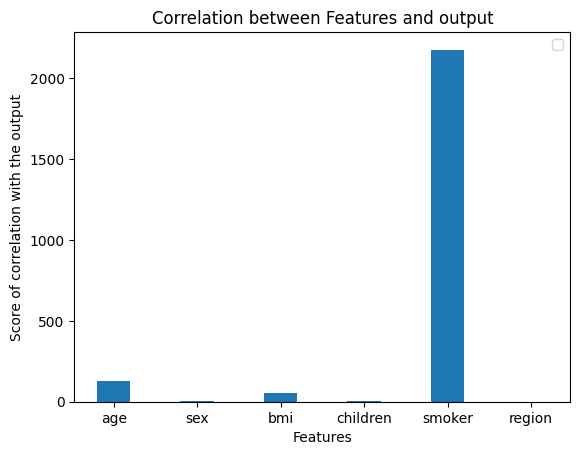

In [18]:
X = dataset_insurance_normalized.drop('charges',axis=1).columns.values

X_axis = np.arange(len(X))
print(X_axis)
plt.bar(X_axis , feature_selection_by_regression[0], 0.4)
  
plt.xticks(X_axis, X)
plt.xlabel("Features")
plt.ylabel("Score of correlation with the output")
plt.title("Correlation between Features and output")
plt.legend()

On remarque qu'il y a une forte corrélation entre le facteur "smoker" et la sortie "charges". <br>
Les deux autres sorties qui ont une corrélation intéressante avec la sortie sont le facteur "age" et "bmi".

#### Methode Wrapper

In [19]:
#On definit une sequence de selection de type forward (on part d'un vecteur nul)
#@parametre: methode d'apprentissage, nombre de facteur souhaiter à la fin, 
#cette méthode va selectionner executer une selection de type wrapper sur les feature
#tout en appliquant à chaque itération un algo de régression linéaire avec pour performance évaluée la mse des feature selectionnées
sffs = SFS(LinearRegression(),
           k_features=len(dataset_insurance_normalized.drop('charges',axis=1).columns.values),
           forward=True,
           floating=True,
           scoring = 'r2', #mse normalisé 
           cv = 0)
#entrainement du modèle et filtre sur notre dataset 
feature_names=dataset_insurance_normalized.drop('charges',axis=1).columns.values
sffs.fit(dataset_insurance_normalized.drop(['charges'],axis=1),dataset_insurance_normalized['charges'])

#Creation d'un dataframe pour les résultats 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results
#la sortie nous montre pour chaque itération les features selectionnées ainsi que la performance du modele de ml entrainer (ici regression
# linéaire)

,feature_idx,cv_scores,avg_score,feature_names
1,"(4,)",[0.6197648148218988],0.619765,"(smoker,)"
2,"(0, 4)",[0.7214008260577199],0.721401,"(age, smoker)"
3,"(0, 2, 4)",[0.7474771588119513],0.747477,"(age, bmi, smoker)"
4,"(0, 2, 3, 4)",[0.749694530346479],0.749695,"(age, bmi, children, smoker)"
5,"(0, 2, 3, 4, 5)",[0.7497680322910479],0.749768,"(age, bmi, children, smoker, region)"
6,"(0, 1, 2, 3, 4, 5)",[0.7497962726676124],0.749796,"(age, sex, bmi, children, smoker, region)"


On remarque que les features ajoutés, s'ajoutent dans le même ordre que leur corrélation avec la sortie (cf methode filter au dessus). <br>
Cependant on remarque que l'ajout du paramètre children augmente encore l'avg_score de manière intéressante ainsi on pourrait également ajouter ce facteur au modèle.

#### Methode Embedded

In [20]:
sel = SelectFromModel(RandomForestRegressor())
sel.fit(dataset_insurance_normalized.drop(['charges'],axis=1), dataset_insurance_normalized['charges'])
selected_feat= dataset_insurance_normalized.drop(['charges'],axis=1).columns[(sel.get_support())]
print(selected_feat)

Index(['bmi', 'smoker'], dtype='object')


On remarque que les paramètres selectionnées sont bmi et smoker. 

#### Conclusion

Pour conclure, on peut choisir de selectionner les facteurs 'smoker', 'age', 'bmi' pour un premier modèle. <br> 
Il pourra être interressant d'ajouter le paramètre 'children' pour l'entrainement d'un second modèle et de comparer ce dernier avec le premier afin de selectionner le plus performant. 

#### Entrainement avec les features selectionnées

In [21]:
X_train_normalized_fs = X_train_normalized.drop(['sex','children','region'],axis=1)
X_test_normalized_fs = X_test_normalized.drop(['sex','children','region'],axis=1)
reg  = LinearRegression()
reg.fit(X_train_normalized_fs, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg.predict(X_test_normalized_fs)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))

ecart type des residus (erreur de prédiction) 0.008329824105641861
coefficients de regression: [0.18873334 0.19095081 0.37710742]
score : 0.7945500805653087


On remarque que notre modèle a un score similaire aux modèles précedents. <br>
Ainsi on peut en déduire qu'il n'est pas nécéssaire de garder les facteurs 'sex', 'children' et 'region' pour l'entrainement. <br>
Cela permet sur des jeux de données avec beaucoup de facteurs, de réduire le nombre de ces derniers utilisés afin de gagner en temps de calcul ainsi que de réduire la complexité du modèle.

### Regression Linéaire Ridge

La méthode ridge applique une valeur alpha de type float à la régréssion afin de réduire ses paramètres. <br>
Cela permet de ne pas avoir un modèle avec des coefficients trop grands et un écart trop important entre eux.

In [22]:
from sklearn.linear_model import Ridge

In [23]:
X_train_normalized.head()

,age,sex,bmi,children,smoker,region
621,0.413043,0.0,0.488028,0.8,1.0,0.0
194,0.000000,0.0,0.496906,0.0,0.0,1.0
240,0.108696,1.0,0.557170,0.4,1.0,0.0
1168,0.304348,0.0,0.517622,0.4,0.0,0.0
1192,0.869565,1.0,0.442158,0.2,0.0,0.0


In [24]:
reg_ridge = Ridge(alpha=4.2)
reg_ridge.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg_ridge.predict(X_test_normalized)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg_ridge.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))

ecart type des residus (erreur de prédiction) 0.008306895013062403
coefficients de regression: [ 1.80405475e-01 -2.35009435e-04  1.68048544e-01  3.31703011e-02
  3.67308842e-01 -1.77467686e-03]
score : 0.7951156123416604


On remarque que nos coefficients n'ont pas les mêmes valeurs, cependant le score du modèle lors du test a pratiquement la même valeur.

### Regression Lasso

In [25]:
from sklearn.linear_model import Lasso


In [31]:
reg_lasso = Lasso(alpha=4.2)
reg_lasso.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg_lasso.predict(X_test_normalized)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg_lasso.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))

ecart type des residus (erreur de prédiction) 0.04057475105430419
coefficients de regression: [ 0. -0.  0.  0.  0.  0.]
score : -0.0007509437736328284


On remarque que les coefficients ont des valeurs nulles. <br>
On remarque également que nous avons un score bien plus faible dans le cas de la regession de Lasso.

In [32]:
reg_lasso = Lasso(alpha=0.001)
reg_lasso.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg_lasso.predict(X_test_normalized)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg_lasso.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))

ecart type des residus (erreur de prédiction) 0.00835481115633762
coefficients de regression: [ 0.17889236 -0.          0.1559625   0.01863117  0.37000772 -0.        ]
score : 0.7939337905347813


On remarque lorsque le coefficient alpha est très faible, les coefficient du modèle ne sont plus égaux à 0, ainsi on peut donc en déduire que la méthode Lasso réduit encore plus les coefficients que la regression de Ridge. <br>
Ici nous avions des coefficients assez faible de base c'est donc pourquoi la méthode de Lasso à fait que nos coefficients étaient égale à 0.

### ElasticNet

In [27]:
from sklearn.linear_model import ElasticNet

In [28]:
reg_elasticNet = ElasticNet(alpha=4.2)
reg_elasticNet.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg_elasticNet.predict(X_test_normalized)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg_elasticNet.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))

ecart type des residus (erreur de prédiction) 0.04057475105430419
coefficients de regression: [ 0. -0.  0.  0.  0.  0.]
score : -0.0007509437736328284


On remarque que les coefficients ont des valeurs nulles. <br>
On remarque également que nous avons un score bien plus faible dans le cas de la regession de Lasso.

In [33]:
reg_elasticNet = ElasticNet(alpha=0.001)
reg_elasticNet.fit(X_train_normalized, y_train_normalized)
# maintenant on passe à la prédiction, donc on applique notre modèle sur le dataset x_test 
y_predic_normalized = reg_elasticNet.predict(X_test_normalized)
rmse_positive = mean_squared_error(y_test_normalized,y_predic_normalized)
print("ecart type des residus (erreur de prédiction)",rmse_positive) 
print("coefficients de regression:",reg_elasticNet.coef_)
print("score :",sklearn.metrics.r2_score(y_test_normalized, y_predic_normalized, multioutput='uniform_average', force_finite=True))

ecart type des residus (erreur de prédiction) 0.008276138395852027
coefficients de regression: [ 1.82176151e-01 -0.00000000e+00  1.70213742e-01  2.64105022e-02
  3.72067956e-01 -1.76500733e-04]
score : 0.7958742051339951


Ici on remarque que comme pour la regression de Lasso, la regression ElasticNet réduit plus facilement les coefficients que Ridge. 

### Conclusion

Ainsi on peut conclure que la regression de Ridge s'appliquera lorsque l'on veut réduire des coefficients qui sont de petite/moyenne taille. <br>
Tandis que les regressions de Lasso et ElasticNet seront utilisées afin de réduire des coefficients de grandes tailles.